In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# Display the first few rows of each dataset to understand the structure
print(calendar.head())
print(listings.head())
print(reviews.head())


   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house 

In [5]:
# Remove dollar signs and commas from price fields
listings['price'] = listings['price'].replace(r'[\$,]', '', regex=True).astype(float)
calendar['price'] = calendar['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Handle missing values by filling them or dropping columns/rows
listings = listings.dropna(subset=['price', 'latitude', 'longitude'])

# Handle missing prices in the calendar dataset (optional, drop them if necessary)
calendar = calendar.dropna(subset=['price'])


In [7]:
# Select features for the price prediction
features = listings[['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'latitude', 'longitude']]

# Convert categorical variable 'room_type' to numerical
features = pd.get_dummies(features, drop_first=True)

# Target variable
target = listings['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Coefficients to understand feature importance
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [9]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Select features for price prediction
features = listings[['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'latitude', 'longitude']]

# Convert categorical variable 'room_type' to numerical
features = pd.get_dummies(features, drop_first=True)

# Target variable
target = listings['price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Coefficients to understand feature importance
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the dataset
listings = pd.read_csv('listings.csv')

# Data Cleaning - Removing '$' and ',' from price column and converting to float
listings['price'] = listings['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Selecting relevant features for the model
features = ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'review_scores_rating']
X = listings[features]
y = listings['price']

# Handle missing data using imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Display the coefficients of the model
coef_df = pd.DataFrame(model.coef_, index=features, columns=['Coefficient'])
print(coef_df)


Root Mean Squared Error: 65.41886898475073
                      Coefficient
accommodates            19.379741
bedrooms                20.255094
bathrooms               28.374705
beds                    -1.729201
minimum_nights           0.037880
maximum_nights          -0.000153
review_scores_rating     0.607012


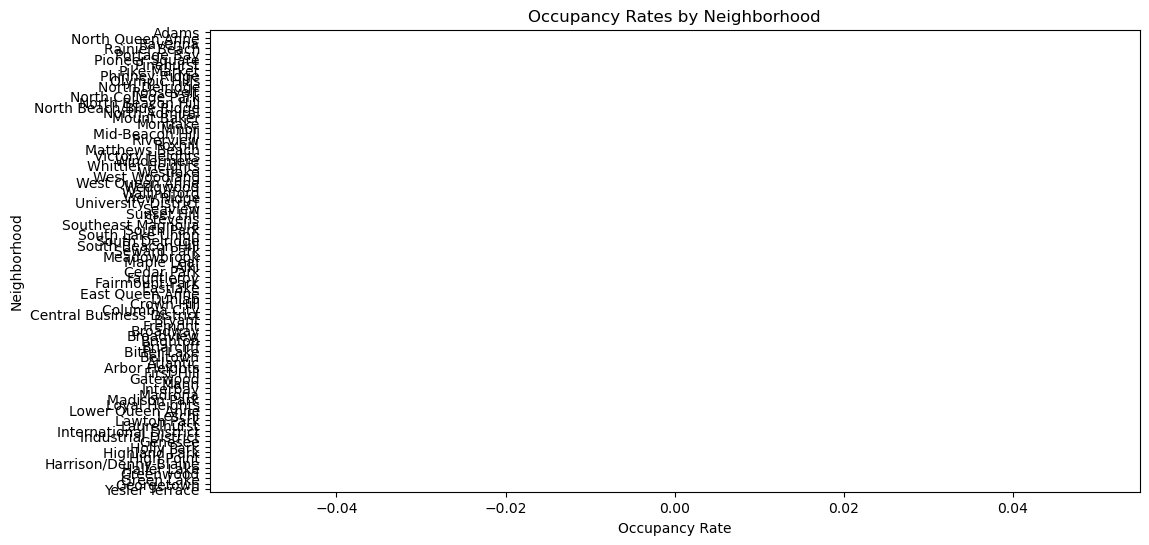

In [17]:
# Merge listings with calendar on 'listing_id'
listings_cal = pd.merge(listings[['id', 'neighbourhood_cleansed']], calendar, left_on='id', right_on='listing_id')

# Group by neighborhood and calculate occupancy rates
occupancy_rates = listings_cal.groupby('neighbourhood_cleansed')['available'].apply(lambda x: (x == 'f').mean()).reset_index()
occupancy_rates.columns = ['Neighborhood', 'Occupancy Rate']

# Sort and visualize
occupancy_rates = occupancy_rates.sort_values(by='Occupancy Rate', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Occupancy Rate', y='Neighborhood', data=occupancy_rates)
plt.title('Occupancy Rates by Neighborhood')
plt.show()


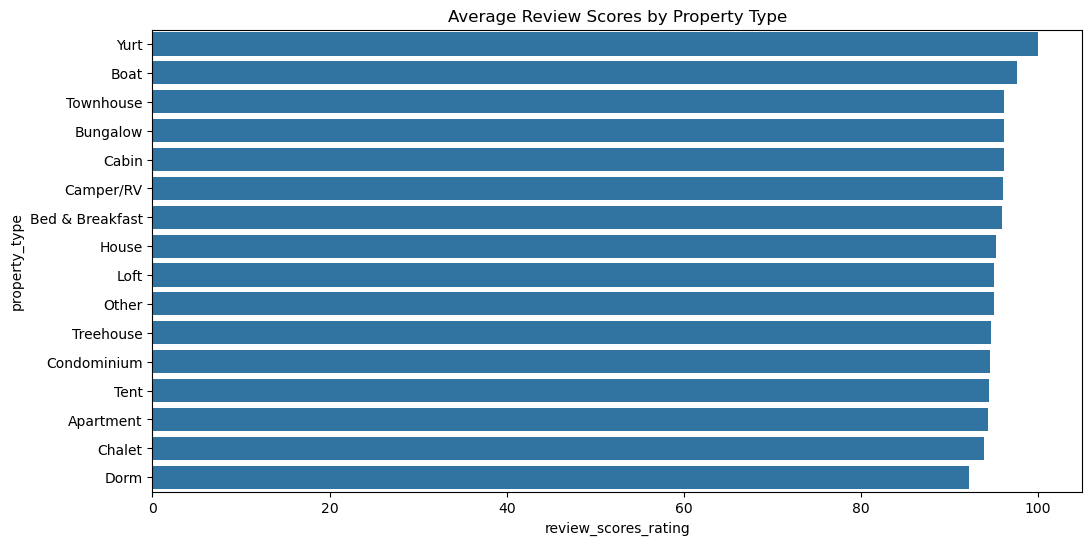

In [19]:
# Merge listings with reviews on 'id' and 'listing_id'
listings_reviews = pd.merge(listings[['id', 'property_type', 'review_scores_rating']], reviews, left_on='id', right_on='listing_id')

# Group by property type and calculate average review scores
review_scores = listings_reviews.groupby('property_type')['review_scores_rating'].mean().reset_index()

# Sort and visualize
review_scores = review_scores.sort_values(by='review_scores_rating', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='review_scores_rating', y='property_type', data=review_scores)
plt.title('Average Review Scores by Property Type')
plt.show()


In [21]:
plt.figure(figsize=(10,6))
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Price Prediction')
plt.show()


NameError: name 'coefficients' is not defined

<Figure size 1000x600 with 0 Axes>

In [23]:
# Store the coefficients in a DataFrame
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Sort by the coefficient value
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Plot the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Price Prediction')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [25]:
# Store the coefficients in a DataFrame
coefficients = pd.DataFrame({
    'Feature': feature_columns,  # Use the original feature columns
    'Coefficient': model.coef_
})

# Sort by the coefficient value
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Plot the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Price Prediction')
plt.show()


NameError: name 'feature_columns' is not defined

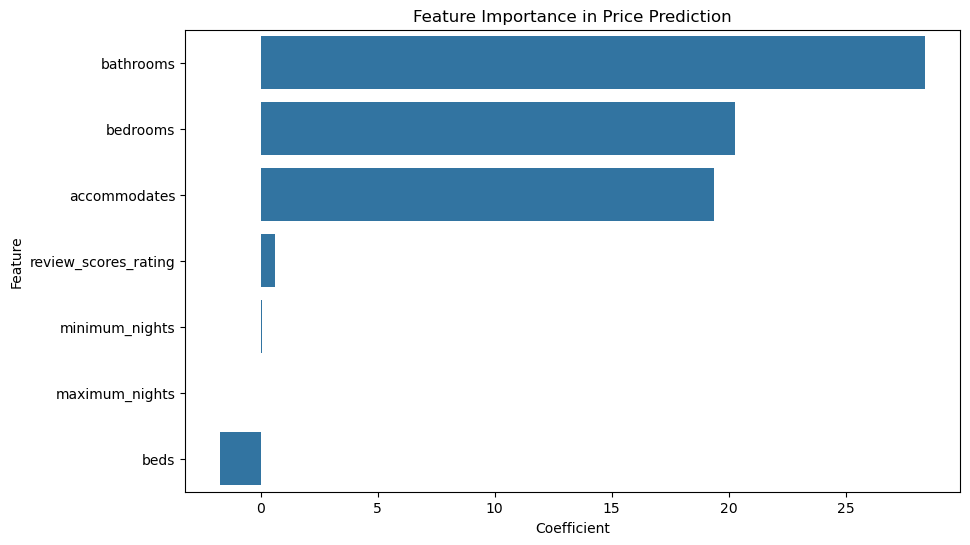

In [27]:
# Define feature columns based on the selected features for your model
feature_columns = ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'review_scores_rating']

# Store the coefficients in a DataFrame
coefficients = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_
})

# Sort by the coefficient value
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Plot the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Price Prediction')
plt.show()


In [29]:
cleaned_listings.to_csv('cleaned_listings.csv', index=False)
calendar.to_csv('cleaned_calendar.csv', index=False)
reviews.to_csv('cleaned_reviews.csv', index=False)

NameError: name 'cleaned_listings' is not defined

In [31]:

# Save cleaned DataFrames to new CSV files
cleaned_listings.to_csv('cleaned_listings.csv', index=False)
cleaned_calendar.to_csv('cleaned_calendar.csv', index=False)
cleaned_reviews.to_csv('cleaned_reviews.csv', index=False)

print("Cleaned data has been saved to CSV files.")


NameError: name 'cleaned_listings' is not defined

In [35]:
import pandas as pd

# Load the original datasets
listings = pd.read_csv('listings.csv')

# Clean the data (example cleaning)
cleaned_listings = listings.drop(columns=['last_scraped', 'host_about'])  # Drop unnecessary columns
cleaned_listings['price'] = cleaned_listings['price'].replace(r'[\$,]', '', regex=True).astype(float)  # Clean price column
cleaned_listings = cleaned_listings.dropna(subset=['price', 'latitude', 'longitude'])  # Drop rows with missing values


In [37]:
# Save cleaned DataFrames to new CSV files
cleaned_listings.to_csv('cleaned_listings.csv', index=False)
# Repeat for other cleaned DataFrames
cleaned_calendar.to_csv('cleaned_calendar.csv', index=False)  # Ensure cleaned_calendar is defined
cleaned_reviews.to_csv('cleaned_reviews.csv', index=False)  # Ensure cleaned_reviews is defined

print("Cleaned data has been saved to CSV files.")


NameError: name 'cleaned_calendar' is not defined

In [40]:
import pandas as pd

# Load the datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# Clean Listings
cleaned_listings = listings.drop(columns=['last_scraped', 'host_about'])  # Drop unnecessary columns
cleaned_listings['price'] = cleaned_listings['price'].replace(r'[\$,]', '', regex=True).astype(float)  # Clean price column
cleaned_listings = cleaned_listings.dropna(subset=['price', 'latitude', 'longitude'])  # Drop rows with missing values

# Clean Calendar
cleaned_calendar = calendar.dropna(subset=['listing_id', 'date'])  # Drop rows with missing listing_id or date

# Clean Reviews
cleaned_reviews = reviews.dropna(subset=['listing_id', 'comments'])  # Drop rows with missing listing_id or comments

# Save cleaned DataFrames
cleaned_listings.to_csv('cleaned_listings.csv', index=False)
cleaned_calendar.to_csv('cleaned_calendar.csv', index=False)
cleaned_reviews.to_csv('cleaned_reviews.csv', index=False)

print("Cleaned data has been saved to CSV files.")


Cleaned data has been saved to CSV files.
